# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

The problem statement is to determine if the decline in new monthly subscribers compared to the past year is due to the current webpage not being adequately designed.

Our Objectives are as follows 


1.   Determine if the users spend more time on the new landing page than the existing landing page
2.   Determine if the conversion rate for the new page greater than the conversion rate of the old page
3.   Determine the relationship between the converted status and preferred language
4.   Determine if the time spent on the new pags is the same for the different language users


## Import all the necessary libraries

In [1]:
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/DSBA/Statistics/Project 2/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
df['user_id'].unique()

array([546592, 546468, 546462, 546567, 546459, 546558, 546448, 546581,
       546461, 546548, 546588, 546546, 546491, 546478, 546578, 546466,
       546443, 546555, 546493, 546549, 546560, 546584, 546450, 546475,
       546456, 546455, 546469, 546586, 546471, 546575, 546464, 546556,
       546585, 546577, 546587, 546552, 546551, 546557, 546487, 546589,
       546559, 546570, 546489, 546453, 546488, 546565, 546460, 546458,
       546492, 546473, 546554, 546457, 546479, 546576, 546482, 546563,
       546569, 546454, 546562, 546574, 546470, 546467, 546572, 546590,
       546553, 546445, 546545, 546582, 546484, 546579, 546568, 546476,
       546452, 546444, 546591, 546583, 546573, 546485, 546486, 546547,
       546490, 546449, 546463, 546580, 546571, 546564, 546465, 546480,
       546447, 546561, 546477, 546451, 546566, 546474, 546550, 546446,
       546544, 546472, 546481, 546483])

As there are a 100 different user_id enteries, we ca take this to mean that no duplicate entries exist

In [7]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 100 rows and 6 columns.


In [8]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


The description of the dataframe tells us that two out of the 6 columns are numerical in type, the others are object based. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


The information of the dataframe tells us that there are no missing values in the dataset as the count of the objects is same as the number of rows.



In [10]:
df['language_preferred'].unique()
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

### Univariate Analysis

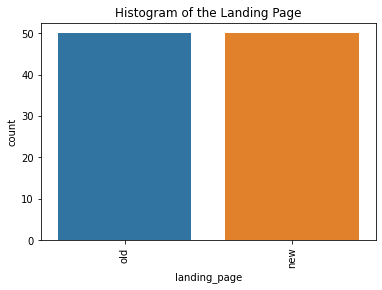

In [11]:
sns.countplot(data=df,x='landing_page')
plt.xticks(rotation=90)
plt.title('Histogram of the Landing Page')
plt.show()

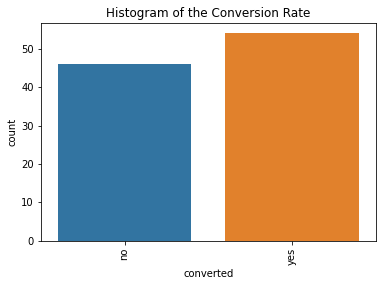

In [12]:
sns.countplot(data=df,x='converted')
plt.xticks(rotation=90)
plt.title('Histogram of the Conversion Rate')
plt.show()

The conversion rate sits at 52% for yes and 48% for no. This data on its own does not tell us the full story as we will need to compare it with the version of the landing page either being the old or the new landing page

Text(0.5, 1.0, 'Distribution of Time Spent on the Page')

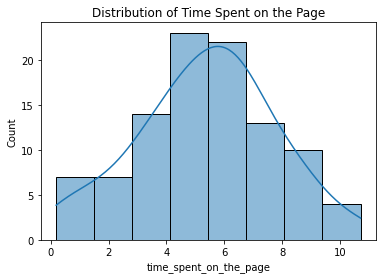

In [13]:
sns.histplot(data=df, x='time_spent_on_the_page', kde=True);
plt.title('Distribution of Time Spent on the Page')

The Histogram of the time spent on the page resembles what seems to be a normal distribution. More analysis will need to be conducted to confirm this

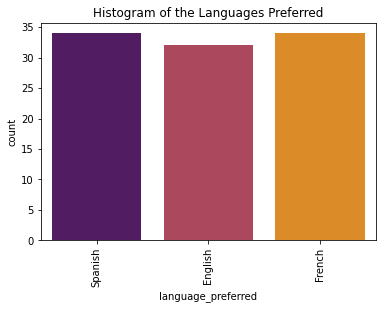

In [14]:
sns.countplot(data=df,x='language_preferred',palette='inferno')
plt.xticks(rotation=90)
plt.title('Histogram of the Languages Preferred')
plt.show()

The Histogram above shows us that the most preferred language is both Spanish and French with 34 counts then English with 32 counts

### Bivariate Analysis

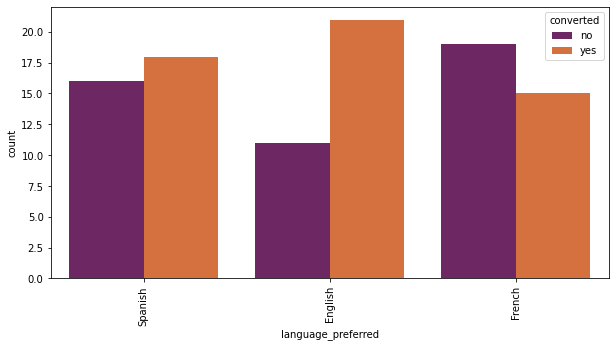

The Conversion Rate by Language Preferred


In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='language_preferred', hue='converted', palette='inferno')
plt.xticks(rotation=90)
plt.show()
print('The Conversion Rate by Language Preferred')

The conversion rate by language preferred tells us that English language pages have the highest conversion rate even though they had the lowest overall count. Second and third are Spanish and French respectively

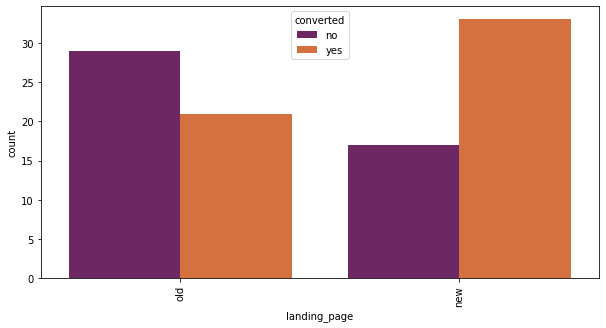

The Conversion Rate by Landing Page Type


In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='landing_page', hue='converted', palette='inferno')
plt.xticks(rotation=90)
plt.show()
print('The Conversion Rate by Landing Page Type')

In [42]:
df_average_time_spent = df.groupby(['landing_page'])['time_spent_on_the_page'].mean()
print(df_average_time_spent)

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64


On average, customers are spending more time on the New landing page compared with the Old

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

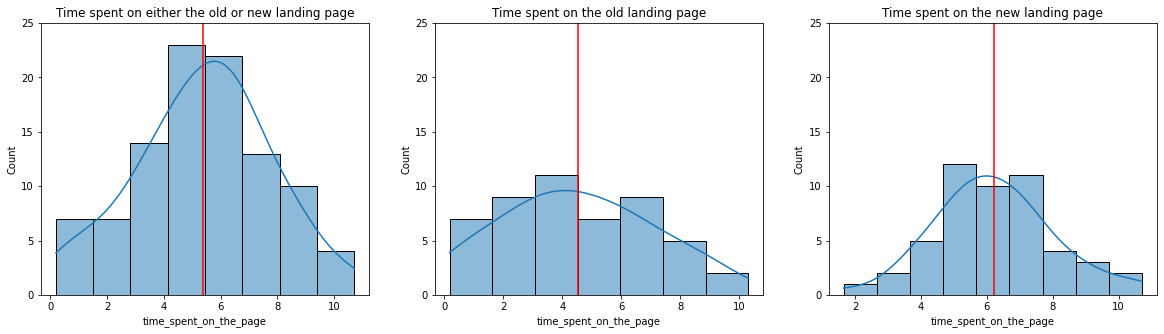

Total & average time spent on the old landing page across 50 users (control group):  226.62 mins and 4.53 mins.
Total & average time spent on the new landing page across 50 users (treatment group):  311.16 mins and 6.22 mins.


In [19]:
fig,ax = plt.subplots(1,3, figsize=(20,5))

sns.histplot(df["time_spent_on_the_page"], ax=ax[0], kde = True);
ax[0].set_ylim((0,25))
ax[0].axvline(df["time_spent_on_the_page"].mean(), c = "r")
ax[0].set_title("Time spent on either the old or new landing page")


df_old = df[ df["landing_page"] == "old" ]
sns.histplot(df_old["time_spent_on_the_page"], ax=ax[1], kde = True);
ax[1].set_ylim((0,25))
ax[1].axvline(df_old["time_spent_on_the_page"].mean(), c = "r")
ax[1].set_title("Time spent on the old landing page")

df_new = df[ df["landing_page"] == "new"]
sns.histplot(df_new["time_spent_on_the_page"], ax=ax[2], kde = True);
ax[2].set_ylim((0,25))
ax[2].axvline(df_new["time_spent_on_the_page"].mean(), c = "r")
ax[2].set_title("Time spent on the new landing page")
plt.show()

print("Total & average time spent on the old landing page across 50 users (control group): ", \
      str(round(df_old["time_spent_on_the_page"].sum(), 2))+ " mins and", \
      str(round(df_old["time_spent_on_the_page"].mean(), 2))+ " mins.")

print("Total & average time spent on the new landing page across 50 users (treatment group): ", \
      str(round(df_new["time_spent_on_the_page"].sum(), 2))+ " mins and", \
      str(round(df_new["time_spent_on_the_page"].mean(), 2))+ " mins.")

### Step 1: Define the null and alternate hypotheses



*   H0 : Null Hypothesis - The mean time spent on the new landing page is the same as the mean time spent on the old landing page
*   Ha : Alternate Hypothesis - The mean time spent on the new landing page is higher than the mean time spent on the old landing page

Let μ1 and μ2 be the mean times spent on the new and old landing pages. 
* H0 : μ1 = μ2
* Ha : μ1 > μ2




### Step 2: Select Appropriate test

Based on the above information, we select a Two Sample Independent T-test for Equality of Means with Unequal Standard Deviation

### Step 3: Decide the significance level

The significance level will be set at 0.05

### Step 4: Collect and prepare data

In [20]:
μ1, μ2 = df_new["time_spent_on_the_page"].mean() , df_old["time_spent_on_the_page"].mean()
std1, std2 = df_new["time_spent_on_the_page"].std() , df_old["time_spent_on_the_page"].std()
print("μ1, μ2, std1, std2:", str(round(μ1,2))+",", str(round(μ2,2))+",", str(round(std1,2))+","\
      , str(round(std2,2))+".")

μ1, μ2, std1, std2: 6.22, 4.53, 1.82, 2.58.


### Step 5: Calculate the p-value

In [21]:
from scipy.stats import ttest_ind

#finding the p-value
test_stat, p_value = ttest_ind(df_new["time_spent_on_the_page"], df_old["time_spent_on_the_page"], \
                               equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [22]:
print('The p-value is ', p_value, 'and the significance level alpha is 0.05')

The p-value is  0.0001392381225166549 and the significance level alpha is 0.05


### Step 7:  Draw inference

As the p-value (0.00014) is less than the significance level, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the mean time spent on the new landing page is higher tha mean time spent on the old landing page

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

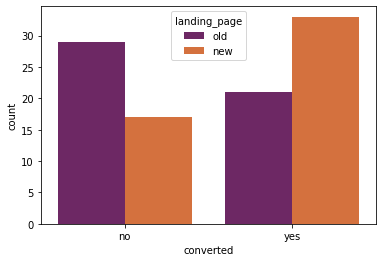

% converted - old landing page:  42.0%
% converted - new landing page:  66.0%


<ipython-input-37-84609c0f15f1>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  str((df_old[df["converted"]=="yes"].count()["group"]/50)*100)+"%" )
<ipython-input-37-84609c0f15f1>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  str((df_new[df["converted"]=="yes"].count()["group"]/50)*100)+"%" )


In [37]:
sns.countplot(x="converted", data=df, hue="landing_page", palette = 'inferno');
plt.show()

print("% converted - old landing page: ", \
      str((df_old[df["converted"]=="yes"].count()["group"]/50)*100)+"%" )

print("% converted - new landing page: ", \
      str((df_new[df["converted"]=="yes"].count()["group"]/50)*100)+"%" )

### Step 1: Define the null and alternate hypotheses



*   H0 : Null Hypothesis - The conversion rate for the new landing page is the same as the conversion rate for the old page
*   Ha : The conversion rate for the new landing page is greater than the conversion rate for the old page

Let c1 and c2 be the conversion rates for the new and old landing pages respectively 
* H0 : c1 = c2
* Ha : c1 > c2




### Step 2: Select Appropriate test

To test the proportions, a Two Proportion Z-test is selected.

### Step 3: Decide the significance level

The significance level is set at 0.05

### Step 4: Collect and prepare data

In [23]:
conversion_new = float(df_new[df["converted"]=="yes"].count()["group"])
c1 = float(round(conversion_new/50, 2))
conversion_old = float(df_old[df["converted"]=="yes"].count()["group"])
c2 = float(round(conversion_old/50, 2))

print('The conversion rates for the new and old landing pages are', c1, 'and', c2, 'respectively.')

The conversion rates for the new and old landing pages are 0.66 and 0.42 respectively.


<ipython-input-23-8cf851af06dd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  conversion_new = float(df_new[df["converted"]=="yes"].count()["group"])
<ipython-input-23-8cf851af06dd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  conversion_old = float(df_old[df["converted"]=="yes"].count()["group"])


### Step 5: Calculate the p-value

In [24]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([conversion_new, conversion_old], [50,50], alternative = 'larger')

print('The p-value is ', str(pval),)

The p-value is  0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [25]:
print('The p-value is ', str(pval), 'and the significance level alpha is 0.05')

The p-value is  0.008026308204056278 and the significance level alpha is 0.05


### Step 7:  Draw inference

As the p-value is 0.008 whcih is less than the significance level of 0.05, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the conversion rate for the new landing page is higher than the conversion rate for the old landing page

## 3. Is the conversion and preferred language are independent or related?

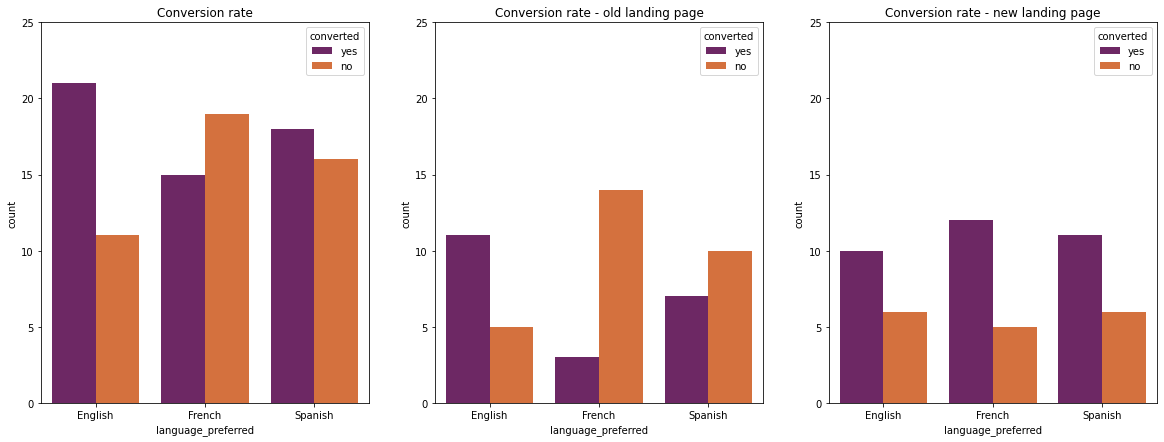

Number of users that prefer English, French and Spanish in the dataset are 32, 34, and 34.

% change in converted - new landing page vs old landing page:
language_preferred
English   -10.00
French     75.00
Spanish    36.36
Name: user_id, dtype: float64


<ipython-input-38-529121dc06d8>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  converted_new = df_new[df["converted"]=="yes"]
<ipython-input-38-529121dc06d8>:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  converted_old = df_old[df["converted"]=="yes"]


In [38]:
fig,ax = plt.subplots(1,3, figsize=(20,7))

sns.countplot(x="language_preferred", data=df.sort_values("language_preferred", ascending = True), \
              hue="converted", palette = 'inferno', ax=ax[0]);
ax[0].set_ylim((0,25))
ax[0].set_title("Conversion rate")

sns.countplot(x="language_preferred", data=df_old.sort_values("language_preferred", ascending = True), \
              hue="converted", palette = 'inferno', ax=ax[1]);
ax[1].set_ylim((0,25))
ax[1].set_title("Conversion rate - old landing page")

sns.countplot(x="language_preferred", data=df_new.sort_values("language_preferred", ascending = True), \
              hue="converted", palette = 'inferno', ax=ax[2]);
ax[2].set_ylim((0,25))
ax[2].set_title("Conversion rate - new landing page")

plt.show()

print("Number of users that prefer English, French and Spanish in the dataset are",  \
      str(df.groupby("language_preferred").count()["user_id"]["English"])+",", \
      str(df.groupby("language_preferred").count()["user_id"]["French"])+", and", \
      str(df.groupby("language_preferred").count()["user_id"]["Spanish"])+"." +"\n")

converted_new = df_new[df["converted"]=="yes"]
converted_old = df_old[df["converted"]=="yes"]

print("% change in converted - new landing page vs old landing page:")

print(round(100*(converted_new.groupby("language_preferred").count()["user_id"] \
    - converted_old.groupby("language_preferred").count()["user_id"])/converted_new.groupby \
("language_preferred").count()["user_id"], 2))

### Step 1: Define the null and alternate hypotheses



*   H0 : Null Hypothesis - The conversion is independent of the preferred language
*   Ha : The conversion is dependent on the preferred language




### Step 2: Select Appropriate test

As this deals with the dependence of two categorical variables, the Chi-Square test for independence is used.

### Step 3: Decide the significance level

The significance level is set at 0.05

### Step 4: Collect and prepare data

In [26]:
#Creating a contingency table

Conversion_language = pd.crosstab(df.converted, df.language_preferred).rename_axis(None,axis=1).reset_index()
Conversion_language

,converted,English,French,Spanish
0,no,11,19,16
1,yes,21,15,18


### Step 5: Calculate the p-value

In [27]:
from scipy.stats import chi2_contingency

#finding the p-value
chi, p_value, dof, expected = chi2_contingency(Conversion_language.drop('converted', axis = 1))
p_value

0.21298887487543447

### Step 6: Compare the p-value with $\alpha$

In [28]:
print('The p-value is ', p_value, 'and the significance level alpha is 0.05')

The p-value is  0.21298887487543447 and the significance level alpha is 0.05


### Step 7:  Draw inference

As the p-value is 0.21 whcih is greater than the significance level of 0.05, we fail to reject the null hypothesis. Hence, we do not have enough evidence to support the claim that the conversion rate is dependent on the preferred language

## 4. Is the time spent on the new page same for the different language users?

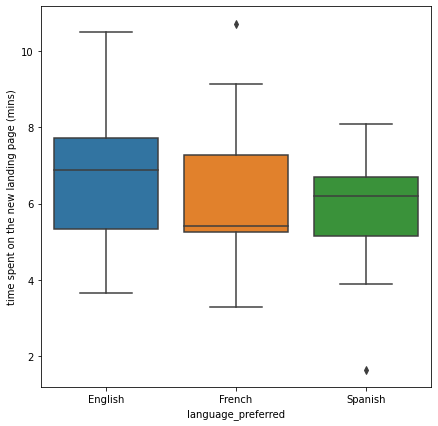

In [40]:
plt.figure(figsize=(7,7))
sns.boxplot(x="language_preferred", y="time_spent_on_the_page",\
            data=df_new.sort_values("language_preferred", ascending = True));
plt.ylabel("time spent on the new landing page (mins)")
plt.show()

### Step 1: Define the null and alternate hypotheses

Let  μ1,  μ2,  μ3 be the mean time spent on the new landing page for the different language users - English, French and Spanish respectively.

*   H0 : Null Hypothesis - The time spent on the new landing page is the same for all languages μ1 = μ2 =  μ3
*   Ha : At least one of μ1,  μ2,  μ3 is different from the rest




### Step 2: Select Appropriate test

As this deals with the testing of different means, Analysis of Variance (ANOVA) test is selected

### Step 3: Decide the significance level

The significance level is set at 0.05

### Step 4: Collect and prepare data

Next,the normality and equality of variance assumptions need to be checked, 

*   For testing normality, Shapiro-Wilk's test is used
*   For equality of varince, Levene's test is used



Shapiro Wilk's Test


*   H0: Null Hypothesis - Time spent on the new landing page follows a normal distribution
*   Ha: Alternate Hypothesis - Time spent on the new landing page does not follow a normal distribution



In [30]:
# find the p-value

w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since the p-value is large, we fail to reject the null hypothesis that the time spent on the new landing page follows a normal distribution

Levene's Test


* H0:Null Hypothesis -  All population variances (time spent on new landing page for different preferred languages) are equal.
* Ha:Alternate Hypothesis - Atleast one variance is different from the rest.

In [31]:
from scipy.stats import levene
statistic, p_value = levene( df_new['time_spent_on_the_page'][df_new['language_preferred']=="English"], 
                             df_new['time_spent_on_the_page'][df_new['language_preferred']=="French"], 
                             df_new['time_spent_on_the_page'][df_new['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


The p-value here is also larger than the significance level hence we fail to reject the hypothesis that all population variances are equal

### Step 5: Calculate the p-value

In [32]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_new.loc[df_new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [33]:
print('The p-value is ', p_value, 'and the significance level alpha is 0.05')

The p-value is  0.43204138694325955 and the significance level alpha is 0.05


### Step 7:  Draw inference

As the p-value is 0.43 which is much higher than the significance level hence we fail to reject the null hypothesis. We do not have enough evidence to conclude that at least one mean time spent on the new landing for the 3 preferred langauges is different

# Conclusion and Business Recommendations




*   The conversion rate is higher for the new landing page (66%) when compared to the old landing page (42%)
*   There are approximately equal number of English, French and Spanish preferring users present in the dataset. Change in conversion for the new landing page vs the old one is -105, 75% and 36.4% for English, French and Spanish respectively

# Statistical Analysis
*   We statistically found enough evidence to support the claim that mean time spent on the new landing page is higher than mean time spent on the old landing page using a two independent sample T-test for equality of means (Unequal std dev.)
*   We statistically found enough evidence to support the claim that the conversion rate for the new landing page is higher than conversion rate for the old landing page using a two proportion Z-test
*   We did not find enough evidence to support the claim that conversion rate is dependent on the preferred language using a chi-square test for independence
*   We did not find enough statistical evidence to conclude that at least one mean time spent on the new landing page for different preferred languages is different from the rest at the preset 5% significance level. An ANOVA test was used for this and the Normality and equality of variances were verified.









___

# Recommendations

*   The new landing page was found to be statistically better in time spent by users on the page as well as conversion rate. Hence, we recommend that it should be fully adopted
*   While we did not find enough statistical evidence from the dataset that conversion rate is dependent on the preferred language, exploratory data analysis of the dataset revealed that French and Spanish preferring users had a higher conversion rate on new landing page while English preferring users had a marginally poorer conversion rate on the new landing page. This could require further investigation

